In [ ]:
# To start 
# Install apache-drill

# I used :

# brew install apache-drill
# it's was saved on  /usr/local/Cellar/apache-drill

# cd /usr/local/Cellar/apache-drill/1.10.0/bin/ && ./drill-embedded

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
%matplotlib inline

In [2]:
dfbusiness = pd.read_csv('/Users/emily/Downloads/dataset/business.csv')


In [3]:
dfbusinessall = dfbusiness
dfbusiness = dfbusiness[['business_id','review_count', 'stars',  'name', 'categories', 'state', 'city','address', 'latitude', 'longitude']]

In [4]:
states = ['AL','AK','AR','AZ','CA','CO','CT','DE','FL','GA','HI','ID','IL','IN','IA','KS','KY','LA','ME','MD','MA','MI','MN','MS','MO','MT','NE','NV','NH','NJ','NM','NY','NC','ND','OH','OK','OR','PA','RI','SC','SD','TN','TX','UT','VT','VA','WA','WV','WI','WY']
dfbusiness=dfbusiness[dfbusiness['state'].isin(['AL','AK','AR','AZ','CA','CO','CT','DE','FL','GA','HI','ID','IL','IN','IA','KS','KY','LA','ME','MD','MA','MI','MN','MS','MO','MT','NE','NV','NH','NJ','NM','NY','NC','ND','OH','OK','OR','PA','RI','SC','SD','TN','TX','UT','VT','VA','WA','WV','WI','WY'])]
dfbusiness

,business_id,review_count,stars,name,categories,state,city,address,latitude,longitude
0,YDf95gJZaq05wvo7hTQbbQ,17,2.0,Richmond Town Square,"[u'Shopping', u'Shopping Centers']",OH,Richmond Heights,691 Richmond Rd,41.541716,-81.493116
1,mLwM-h2YhXl2NCgdS84_Bw,4,4.5,South Florida Style Chicken & Ribs,"[u'Food', u'Soul Food', u'Convenience Stores',...",NC,Charlotte,2824 Milton Rd,35.236870,-80.741976
3,CVtCbSB1zUcUWg-9TNGTuQ,3,3.0,TRUmatch,"[u'Professional Services', u'Matchmakers']",AZ,Scottsdale,"7702 E Doubletree Ranch Rd, Ste 300",33.565082,-111.916400
4,duHFBe87uNSXImQmvBh87Q,10,4.5,Blimpie,"[u'Sandwiches', u'Restaurants']",AZ,Phoenix,4719 N 20Th St,33.505928,-112.038847
5,uUEMrhJiL1a1pCA_I1SU7Q,35,5.0,Baxter's Cigars,"[u'Shopping', u'Tobacco Shops']",AZ,Phoenix,2017 E Camelback Rd,33.508068,-112.037552
6,2eJEUJIP54tex7T9YOcLSw,19,5.0,Back-Health Chiropractic,"[u'Chiropractors', u'Health & Medical']",AZ,Phoenix,"4425 N 24th St, Ste 125",33.502848,-112.012696
7,fEylCY3UEH8YJ0Xa7lu6lA,16,2.5,Auto Bathouse,"[u'Automotive', u'Oil Change Stations', u'Car ...",PA,Pittsburgh,5770 Butler St,40.485939,-79.943727
8,kFtuYklkAIlmYw8RZAieGw,7,5.0,JAB Jewelry Designs,"[u'Jewelry Repair', u'Gold Buyers', u'Local Se...",PA,McMurray,3220 Washington Rd,40.290498,-80.110021
9,NqiQdFa93wzUJGo29NbTPQ,8,5.0,Neighborhood Vision Center,"[u'Health & Medical', u'Optometrists']",AZ,Gilbert,"1425 S Higley Rd, Ste 103",33.324539,-111.720449
10,N9BN9ldVl1FNzcB9_eAstw,13,4.5,Red Rock Bowling UYE Part 2,"[u'Bowling', u'Active Life']",NV,Las Vegas,11022 W Charleston Blvd,36.159098,-115.337915


In [5]:
dfbusinessall.groupby(['state']).size().reset_index(name='counts')

,state,counts
0,01,6
1,3,1
2,75,1
3,ABE,2
4,AL,2
5,AZ,47376
6,BW,3071
7,BY,4
8,C,32
9,CA,6


In [6]:
dfbusiness.groupby(['state']).size().reset_index(name='counts')

,state,counts
0,AL,2
1,AZ,47376
2,CA,6
3,DE,1
4,FL,1
5,IL,1667
6,NC,11299
7,NE,1
8,NV,30571
9,NY,15


In [7]:
food_list = []
for i in dfbusiness['categories']:
    if 'Food' in i or 'Restaurants' in i:
        food_list.append(i)
dfbusiness=dfbusiness[dfbusiness['categories'].isin(food_list)]

In [8]:
dfbusiness

,business_id,review_count,stars,name,categories,state,city,address,latitude,longitude
1,mLwM-h2YhXl2NCgdS84_Bw,4,4.5,South Florida Style Chicken & Ribs,"[u'Food', u'Soul Food', u'Convenience Stores',...",NC,Charlotte,2824 Milton Rd,35.236870,-80.741976
4,duHFBe87uNSXImQmvBh87Q,10,4.5,Blimpie,"[u'Sandwiches', u'Restaurants']",AZ,Phoenix,4719 N 20Th St,33.505928,-112.038847
12,n33Izvzk_z9_51H6NsQF-A,21,2.0,Safeway,"[u'Flowers & Gifts', u'Bakeries', u'Grocery', ...",AZ,Mesa,9101 E Baseline Rd,33.377428,-111.638108
14,SDMRxmcKPNt1AHPBKqO64Q,21,2.0,Applebee's,"[u'Burgers', u'Bars', u'Restaurants', u'Sports...",NC,Matthews,9616 E Independence Blvd,35.135196,-80.714683
15,iFEiMJoEqyB9O8OUNSdLzA,3,3.0,China Garden,"[u'Chinese', u'Restaurants']",NC,Stanley,190 E Dallas Rd,35.355085,-81.087268
18,1cLXGXThDYZ5WK_KpBLtkw,162,4.0,Koko Bakery,"[u'Food', u'Bakeries', u'Coffee & Tea']",OH,Cleveland,3710 Payne Ave,41.509408,-81.662162
21,HmI9nhgOkrXlUr6KZGZZew,15,3.0,Rocky's,"[u'Sandwiches', u'Restaurants', u'Italian', u'...",PA,Pittsburgh,4759 Liberty Ave,40.461350,-79.948113
31,TXiEgINSZ75d3EtvLvkc4Q,45,3.0,Red Lobster,"[u'Restaurants', u'Seafood', u'American (Tradi...",WI,Madison,4502 East Towne Blvd,43.128034,-89.307157
36,PV9CdNFDOX4_zWm3Sy3W8g,117,3.0,Quaker Steak & Lube,"[u'Burgers', u'Chicken Wings', u'Bars', u'Rest...",WI,Middleton,2259 Deming Way,43.097806,-89.519217
42,HRFJlSAP_EBU_MpPPmpUDQ,20,2.5,Domino's Pizza,"[u'Chicken Wings', u'Sandwiches', u'Restaurant...",AZ,Chandler,25 W Warner Rd,33.335058,-111.843076


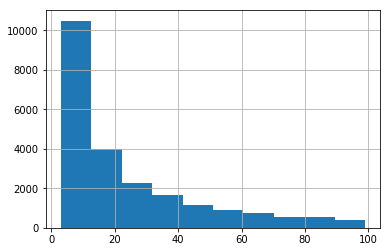

In [7]:
rev_count = dfbusiness[dfbusiness['review_count']<100]
rev_count.review_count.hist()

In [8]:
dfcheckin = pd.read_csv('/Users/emily/Downloads/dataset/checkin_binned.csv')
dfcheckin.head()

,business_id,Mon_Morning,Mon_Afternoon,Mon_Night,Mon_Late,Tues_Morning,Tues_Afternoon,Tues_Night,Tues_Late,Weds_Morning,...,Fri_Night,Fri_Late,Sat_Morning,Sat_Afternoon,Sat_Night,Sat_Late,Sun_Morning,Sun_Afternoon,Sun_Night,Sun_Late
0,7KPBkxAOEtb3QeIL9PEErg,1,2,4,0,0,5,7,1,3,...,8,3,1,11,8,4,1,3,10,6
1,kREVIrSBbtqBhIYkTccQUg,0,1,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,1,0
2,tJRDll5yqpZwehenzE2cSg,0,1,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,nhZ1HGWD8lMErdn3FuWuTQ,0,1,6,1,0,1,6,1,0,...,3,2,0,1,6,3,0,2,2,2
4,vDoXZGE7p6xAkKQ0XQPvoA,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [9]:
dfcheckin = pd.read_csv('/Users/emily/Downloads/checkedin.csv')
dfcheckin.head()

,business_id,Morning,Afternoon,Night,Late
0,7KPBkxAOEtb3QeIL9PEErg,8,32,52,21
1,kREVIrSBbtqBhIYkTccQUg,0,4,3,0
2,tJRDll5yqpZwehenzE2cSg,0,2,0,2
3,nhZ1HGWD8lMErdn3FuWuTQ,0,5,26,14
4,vDoXZGE7p6xAkKQ0XQPvoA,0,1,1,0


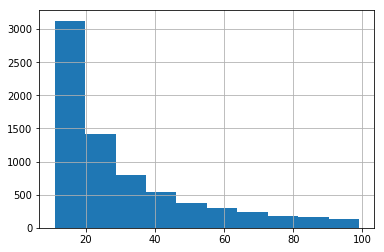

In [10]:
rev_count = dfcheckin[dfcheckin['Morning']>10]
rev_count = rev_count[rev_count['Morning']<100]
rev_count.Morning.hist()

In [10]:
df_both = pd.concat([dfbusiness, dfcheckin], axis=1, join='inner')
df_both.head()

,business_id,review_count,stars,name,categories,state,city,address,latitude,longitude,business_id,Morning,Afternoon,Night,Late
1,mLwM-h2YhXl2NCgdS84_Bw,4,4.5,South Florida Style Chicken & Ribs,"[u'Food', u'Soul Food', u'Convenience Stores',...",NC,Charlotte,2824 Milton Rd,35.236870,-80.741976,kREVIrSBbtqBhIYkTccQUg,0,4,3,0
4,duHFBe87uNSXImQmvBh87Q,10,4.5,Blimpie,"[u'Sandwiches', u'Restaurants']",AZ,Phoenix,4719 N 20Th St,33.505928,-112.038847,vDoXZGE7p6xAkKQ0XQPvoA,0,1,1,0
12,n33Izvzk_z9_51H6NsQF-A,21,2.0,Safeway,"[u'Flowers & Gifts', u'Bakeries', u'Grocery', ...",AZ,Mesa,9101 E Baseline Rd,33.377428,-111.638108,Y6L37i6rkqDzMesTN5UI2Q,0,9,73,9
14,SDMRxmcKPNt1AHPBKqO64Q,21,2.0,Applebee's,"[u'Burgers', u'Bars', u'Restaurants', u'Sports...",NC,Matthews,9616 E Independence Blvd,35.135196,-80.714683,GbSKygYKUy13yoZZdVxJuQ,0,3,5,0
15,iFEiMJoEqyB9O8OUNSdLzA,3,3.0,China Garden,"[u'Chinese', u'Restaurants']",NC,Stanley,190 E Dallas Rd,35.355085,-81.087268,FQM4pVt1jeZcBGLIsXhXNA,0,1,19,15


In [11]:
df_both

,business_id,review_count,stars,name,categories,state,city,address,latitude,longitude,business_id,Morning,Afternoon,Night,Late
1,mLwM-h2YhXl2NCgdS84_Bw,4,4.5,South Florida Style Chicken & Ribs,"[u'Food', u'Soul Food', u'Convenience Stores',...",NC,Charlotte,2824 Milton Rd,35.236870,-80.741976,kREVIrSBbtqBhIYkTccQUg,0,4,3,0
4,duHFBe87uNSXImQmvBh87Q,10,4.5,Blimpie,"[u'Sandwiches', u'Restaurants']",AZ,Phoenix,4719 N 20Th St,33.505928,-112.038847,vDoXZGE7p6xAkKQ0XQPvoA,0,1,1,0
12,n33Izvzk_z9_51H6NsQF-A,21,2.0,Safeway,"[u'Flowers & Gifts', u'Bakeries', u'Grocery', ...",AZ,Mesa,9101 E Baseline Rd,33.377428,-111.638108,Y6L37i6rkqDzMesTN5UI2Q,0,9,73,9
14,SDMRxmcKPNt1AHPBKqO64Q,21,2.0,Applebee's,"[u'Burgers', u'Bars', u'Restaurants', u'Sports...",NC,Matthews,9616 E Independence Blvd,35.135196,-80.714683,GbSKygYKUy13yoZZdVxJuQ,0,3,5,0
15,iFEiMJoEqyB9O8OUNSdLzA,3,3.0,China Garden,"[u'Chinese', u'Restaurants']",NC,Stanley,190 E Dallas Rd,35.355085,-81.087268,FQM4pVt1jeZcBGLIsXhXNA,0,1,19,15
18,1cLXGXThDYZ5WK_KpBLtkw,162,4.0,Koko Bakery,"[u'Food', u'Bakeries', u'Coffee & Tea']",OH,Cleveland,3710 Payne Ave,41.509408,-81.662162,yEWrdUczj1_9KTUJEVfIIg,0,1,7,3
21,HmI9nhgOkrXlUr6KZGZZew,15,3.0,Rocky's,"[u'Sandwiches', u'Restaurants', u'Italian', u'...",PA,Pittsburgh,4759 Liberty Ave,40.461350,-79.948113,vl02XdFVoXC-s_Y4WVvL-g,0,2,2,0
31,TXiEgINSZ75d3EtvLvkc4Q,45,3.0,Red Lobster,"[u'Restaurants', u'Seafood', u'American (Tradi...",WI,Madison,4502 East Towne Blvd,43.128034,-89.307157,KH6AnamatNNCKszLpopjOg,0,5,40,1
36,PV9CdNFDOX4_zWm3Sy3W8g,117,3.0,Quaker Steak & Lube,"[u'Burgers', u'Chicken Wings', u'Bars', u'Rest...",WI,Middleton,2259 Deming Way,43.097806,-89.519217,P2zXpZN7UTDDM9_Q7Bs8Jg,0,30,24,2
42,HRFJlSAP_EBU_MpPPmpUDQ,20,2.5,Domino's Pizza,"[u'Chicken Wings', u'Sandwiches', u'Restaurant...",AZ,Chandler,25 W Warner Rd,33.335058,-111.843076,xkL44jsxVw_N8_6zjTuBNg,0,0,1,0


In [12]:
df_both.groupby(['state']).size().reset_index(name='counts')

,state,counts
0,AZ,11417
1,CA,1
2,IL,620
3,NC,4017
4,NV,7674
5,NY,11
6,OH,4911
7,PA,3807
8,SC,240
9,WA,2


In [13]:
#df_schools = pd.read_csv("/Users/emily/Downloads/postscndryunivsrvy2013dirinfo.csv")
df_schools = pd.read_csv("/Users/emily/Downloads/school_size.csv")

def haversine_np(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)

    All args must be of equal length.    

    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    miles = 3956 * c
    #km = 6367 * c
    return miles # km

def convert_f64(column): return column.astype(np.float64)



In [14]:

def stepJoin(df1,df2,nsteps,nrows,filter=10):
    results_df=[]
    for i in range(nsteps):
        df_joined =df1[(i*nrows):((i+1)*nrows)].merge(df2)
        df_joined['longitude'] = convert_f64(df_joined['longitude'])
        df_joined['latitude'] = convert_f64(df_joined['latitude'])
        df_joined['LONGITUDE'] = convert_f64(df_joined['LONGITUDE'])
        df_joined['LATITUDE'] = convert_f64(df_joined['LATITUDE'])
        df_joined['dist'] = haversine_np(df_joined['longitude'],df_joined['latitude'],df_joined['LONGITUDE'],df_joined['LATITUDE'])
        df_filtered = df_joined[df_joined['dist']<5]
        results_df.append(df_filtered)
    return pd.concat(results_df)



In [15]:
df_both['tmp'] =1
df_schools['tmp'] =1
resdf = stepJoin(df_both,df_schools,2,1000)


In [16]:
resdf

,business_id,review_count,stars,name,categories,state,city,address,latitude,longitude,...,tmp,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,LATITUDE,LONGITUDE,UGDS,dist
2657,mLwM-h2YhXl2NCgdS84_Bw,4,4.5,South Florida Style Chicken & Ribs,"[u'Food', u'Soul Food', u'Convenience Stores',...",NC,Charlotte,2824 Milton Rd,35.236870,-80.741976,...,1,University of North Carolina at Charlotte,Charlotte,NC,28223-0001,Southern Association of Colleges and Schools C...,35.306834,-80.735790,22686.0,4.843249
4546,mLwM-h2YhXl2NCgdS84_Bw,4,4.5,South Florida Style Chicken & Ribs,"[u'Food', u'Soul Food', u'Convenience Stores',...",NC,Charlotte,2824 Milton Rd,35.236870,-80.741976,...,1,King's College,Charlotte,NC,28204,Accrediting Council for Independent Colleges a...,35.213048,-80.822384,380.0,4.824275
5429,mLwM-h2YhXl2NCgdS84_Bw,4,4.5,South Florida Style Chicken & Ribs,"[u'Food', u'Soul Food', u'Convenience Stores',...",NC,Charlotte,2824 Milton Rd,35.236870,-80.741976,...,1,Charlotte Christian College and Theological Se...,Charlotte,NC,28205-1648,Transnational Association of Christian College...,35.242999,-80.802527,93.0,3.440732
6202,mLwM-h2YhXl2NCgdS84_Bw,4,4.5,South Florida Style Chicken & Ribs,"[u'Food', u'Soul Food', u'Convenience Stores',...",NC,Charlotte,2824 Milton Rd,35.236870,-80.741976,...,1,Brightwood College-Charlotte,Charlotte,NC,28212,Accrediting Council for Independent Colleges a...,35.177020,-80.752731,306.0,4.176664
6223,mLwM-h2YhXl2NCgdS84_Bw,4,4.5,South Florida Style Chicken & Ribs,"[u'Food', u'Soul Food', u'Convenience Stores',...",NC,Charlotte,2824 Milton Rd,35.236870,-80.741976,...,1,The Hair Design School-Charlotte,Charlotte,NC,28213,National Accrediting Commission of Career Arts...,35.258550,-80.783700,82.0,2.788522
7690,duHFBe87uNSXImQmvBh87Q,10,4.5,Blimpie,"[u'Sandwiches', u'Restaurants']",AZ,Phoenix,4719 N 20Th St,33.505928,-112.038847,...,1,GateWay Community College,Phoenix,AZ,85034,North Central Association of Colleges and Scho...,33.449500,-111.996527,5019.0,4.595635
7700,duHFBe87uNSXImQmvBh87Q,10,4.5,Blimpie,"[u'Sandwiches', u'Restaurants']",AZ,Phoenix,4719 N 20Th St,33.505928,-112.038847,...,1,Phoenix College,Phoenix,AZ,85013,North Central Association of Colleges and Scho...,33.481361,-112.088293,9745.0,3.314083
7706,duHFBe87uNSXImQmvBh87Q,10,4.5,Blimpie,"[u'Sandwiches', u'Restaurants']",AZ,Phoenix,4719 N 20Th St,33.505928,-112.038847,...,1,Refrigeration School Inc,Phoenix,AZ,85034-1816,Accrediting Commission of Career Schools and C...,33.448692,-111.989357,688.0,4.872482
7708,duHFBe87uNSXImQmvBh87Q,10,4.5,Blimpie,"[u'Sandwiches', u'Restaurants']",AZ,Phoenix,4719 N 20Th St,33.505928,-112.038847,...,1,Roberto-Venn School of Luthiery,Phoenix,AZ,85007,Accrediting Commission of Career Schools and C...,33.454890,-112.086161,32.0,4.454483
11792,duHFBe87uNSXImQmvBh87Q,10,4.5,Blimpie,"[u'Sandwiches', u'Restaurants']",AZ,Phoenix,4719 N 20Th St,33.505928,-112.038847,...,1,Maricopa Skill Center,Phoenix,AZ,85034-4101,North Central Association of Colleges and Scho...,33.435722,-112.054739,765.0,4.933064


In [17]:
resdf['total_checkin'] = resdf['Morning'] + resdf['Afternoon'] + resdf['Night'] + resdf['Late']
resdf

,business_id,review_count,stars,name,categories,state,city,address,latitude,longitude,...,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,LATITUDE,LONGITUDE,UGDS,dist,total_checkin
2657,mLwM-h2YhXl2NCgdS84_Bw,4,4.5,South Florida Style Chicken & Ribs,"[u'Food', u'Soul Food', u'Convenience Stores',...",NC,Charlotte,2824 Milton Rd,35.236870,-80.741976,...,University of North Carolina at Charlotte,Charlotte,NC,28223-0001,Southern Association of Colleges and Schools C...,35.306834,-80.735790,22686.0,4.843249,7
4546,mLwM-h2YhXl2NCgdS84_Bw,4,4.5,South Florida Style Chicken & Ribs,"[u'Food', u'Soul Food', u'Convenience Stores',...",NC,Charlotte,2824 Milton Rd,35.236870,-80.741976,...,King's College,Charlotte,NC,28204,Accrediting Council for Independent Colleges a...,35.213048,-80.822384,380.0,4.824275,7
5429,mLwM-h2YhXl2NCgdS84_Bw,4,4.5,South Florida Style Chicken & Ribs,"[u'Food', u'Soul Food', u'Convenience Stores',...",NC,Charlotte,2824 Milton Rd,35.236870,-80.741976,...,Charlotte Christian College and Theological Se...,Charlotte,NC,28205-1648,Transnational Association of Christian College...,35.242999,-80.802527,93.0,3.440732,7
6202,mLwM-h2YhXl2NCgdS84_Bw,4,4.5,South Florida Style Chicken & Ribs,"[u'Food', u'Soul Food', u'Convenience Stores',...",NC,Charlotte,2824 Milton Rd,35.236870,-80.741976,...,Brightwood College-Charlotte,Charlotte,NC,28212,Accrediting Council for Independent Colleges a...,35.177020,-80.752731,306.0,4.176664,7
6223,mLwM-h2YhXl2NCgdS84_Bw,4,4.5,South Florida Style Chicken & Ribs,"[u'Food', u'Soul Food', u'Convenience Stores',...",NC,Charlotte,2824 Milton Rd,35.236870,-80.741976,...,The Hair Design School-Charlotte,Charlotte,NC,28213,National Accrediting Commission of Career Arts...,35.258550,-80.783700,82.0,2.788522,7
7690,duHFBe87uNSXImQmvBh87Q,10,4.5,Blimpie,"[u'Sandwiches', u'Restaurants']",AZ,Phoenix,4719 N 20Th St,33.505928,-112.038847,...,GateWay Community College,Phoenix,AZ,85034,North Central Association of Colleges and Scho...,33.449500,-111.996527,5019.0,4.595635,2
7700,duHFBe87uNSXImQmvBh87Q,10,4.5,Blimpie,"[u'Sandwiches', u'Restaurants']",AZ,Phoenix,4719 N 20Th St,33.505928,-112.038847,...,Phoenix College,Phoenix,AZ,85013,North Central Association of Colleges and Scho...,33.481361,-112.088293,9745.0,3.314083,2
7706,duHFBe87uNSXImQmvBh87Q,10,4.5,Blimpie,"[u'Sandwiches', u'Restaurants']",AZ,Phoenix,4719 N 20Th St,33.505928,-112.038847,...,Refrigeration School Inc,Phoenix,AZ,85034-1816,Accrediting Commission of Career Schools and C...,33.448692,-111.989357,688.0,4.872482,2
7708,duHFBe87uNSXImQmvBh87Q,10,4.5,Blimpie,"[u'Sandwiches', u'Restaurants']",AZ,Phoenix,4719 N 20Th St,33.505928,-112.038847,...,Roberto-Venn School of Luthiery,Phoenix,AZ,85007,Accrediting Commission of Career Schools and C...,33.454890,-112.086161,32.0,4.454483,2
11792,duHFBe87uNSXImQmvBh87Q,10,4.5,Blimpie,"[u'Sandwiches', u'Restaurants']",AZ,Phoenix,4719 N 20Th St,33.505928,-112.038847,...,Maricopa Skill Center,Phoenix,AZ,85034-4101,North Central Association of Colleges and Scho...,33.435722,-112.054739,765.0,4.933064,2


In [36]:
UNCC = resdf[resdf['INSTNM']=='University of North Carolina at Charlotte']
UNCC

,business_id,review_count,stars,name,categories,state,city,address,latitude,longitude,...,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,LATITUDE,LONGITUDE,UGDS,dist,total_checkin
2657,mLwM-h2YhXl2NCgdS84_Bw,4,4.5,South Florida Style Chicken & Ribs,"[u'Food', u'Soul Food', u'Convenience Stores',...",NC,Charlotte,2824 Milton Rd,35.236870,-80.741976,...,University of North Carolina at Charlotte,Charlotte,NC,28223-0001,Southern Association of Colleges and Schools C...,35.306834,-80.73579,22686.0,4.843249,7
822701,taQyhYtNzD4vujSvP3CDkQ,33,4.5,Rita's Italian Ice,"[u'Food', u'Shaved Ice', u'Ice Cream & Frozen ...",NC,Charlotte,"2015 East Arbors Dr, Ste 260, The Arbors In Ch...",35.337020,-80.756294,...,University of North Carolina at Charlotte,Charlotte,NC,28223-0001,Southern Association of Colleges and Schools C...,35.306834,-80.73579,22686.0,2.382883,5
845480,kLVK8y8YQeRkJeld5eZbwg,27,3.0,Macado's,"[u'Bars', u'Restaurants', u'American (Traditio...",NC,Concord Mills,8111 Concord Blvd,35.369222,-80.722126,...,University of North Carolina at Charlotte,Charlotte,NC,28223-0001,Southern Association of Colleges and Schools C...,35.306834,-80.73579,22686.0,4.375819,2
1020119,vn_UN1JnA57hpayj6ETpRQ,38,2.5,IHOP,"[u'American (Traditional)', u'Breakfast & Brun...",NC,Charlotte,230 E Wt Harris Blvd,35.303872,-80.749548,...,University of North Carolina at Charlotte,Charlotte,NC,28223-0001,Southern Association of Colleges and Schools C...,35.306834,-80.73579,22686.0,0.801740,326
1027712,kByQQ4yd7ZbA0MAQKmRVvg,44,2.5,TGI Fridays,"[u'American (Traditional)', u'Nightlife', u'Re...",NC,Concord,8041 Concord Mills Blvd,35.370587,-80.718237,...,University of North Carolina at Charlotte,Charlotte,NC,28223-0001,Southern Association of Colleges and Schools C...,35.306834,-80.73579,22686.0,4.511498,6
1506071,YGcpct62yl0lEGPlJrII5g,12,2.5,Bojangles' Famous Chicken 'n Biscuits,"[u'Restaurants', u'Breakfast & Brunch', u'Chic...",NC,Charlotte,10329 Mallard Creek Rd,35.341413,-80.769465,...,University of North Carolina at Charlotte,Charlotte,NC,28223-0001,Southern Association of Colleges and Schools C...,35.306834,-80.73579,22686.0,3.049399,2
1938872,13eX63udIlRK8NNF0EnwAQ,4,5.0,Big City Grill,"[u'Greek', u'Restaurants', u'Burgers', u'Ameri...",NC,Charlotte,"4450 The Plaza, Ste E",35.249536,-80.778819,...,University of North Carolina at Charlotte,Charlotte,NC,28223-0001,Southern Association of Colleges and Schools C...,35.306834,-80.73579,22686.0,4.640420,11
2060360,5PpFojIpkGV4JoUP7XJ_Zw,14,3.0,Chuck E. Cheese's,"[u'Event Planning & Services', u'Pizza', u'Ame...",NC,Concord,7970 Lyles Ln NW,35.364491,-80.716508,...,University of North Carolina at Charlotte,Charlotte,NC,28223-0001,Southern Association of Colleges and Schools C...,35.306834,-80.73579,22686.0,4.126429,18
2432417,hJ3GEL6TJVfh7UI9luTQ0g,7,2.5,Boston Market,"[u'Event Planning & Services', u'American (Tra...",NC,Charlotte,1001 Chancellor Park Dr,35.294233,-80.743150,...,University of North Carolina at Charlotte,Charlotte,NC,28223-0001,Southern Association of Colleges and Schools C...,35.306834,-80.73579,22686.0,0.963833,1
2538719,ydUqgWsF3F27TbauOyib0w,32,4.0,Panda's Den,"[u'Chinese', u'Restaurants']",NC,Charlotte,5724 E Wt Harris Blvd,35.237233,-80.737118,...,University of North Carolina at Charlotte,Charlotte,NC,28223-0001,Southern Association of Colleges and Schools C...,35.306834,-80.73579,22686.0,4.806235,38


In [38]:
UNCC.sort_values(by='total_checkin', ascending=False)


,business_id,review_count,stars,name,categories,state,city,address,latitude,longitude,...,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,LATITUDE,LONGITUDE,UGDS,dist,total_checkin
4619201,tYmFO3KoZpYvyDz4f5DLpw,10,2.5,Fanz Sports Grill,"[u'Restaurants', u'American (Traditional)']",NC,Charlotte,3425 David Cox Rd,35.333813,-80.791410,...,University of North Carolina at Charlotte,Charlotte,NC,28223-0001,Southern Association of Colleges and Schools C...,35.306834,-80.73579,22686.0,3.645305,507
6578195,CA9DW-u62WT8Ds2ZDUvNNw,37,3.0,Chili's,"[u'American (Traditional)', u'Sports Bars', u'...",NC,Charlotte,500 University Center Blvd,35.308704,-80.755472,...,University of North Carolina at Charlotte,Charlotte,NC,28223-0001,Southern Association of Colleges and Schools C...,35.306834,-80.73579,22686.0,1.116481,410
5811302,chBeDQdaZgrb8iOzqgeCDA,61,4.0,China Palace,"[u'Restaurants', u'Chinese']",NC,Charlotte,9211 N Tryon St,35.312167,-80.745089,...,University of North Carolina at Charlotte,Charlotte,NC,28223-0001,Southern Association of Colleges and Schools C...,35.306834,-80.73579,22686.0,0.640386,351
5135525,Pjft52J1DsZcSDZTu5XPtg,22,2.5,Waffle House,"[u'American (Traditional)', u'Breakfast & Brun...",NC,Charlotte,4739 S Blvd,35.250448,-80.736085,...,University of North Carolina at Charlotte,Charlotte,NC,28223-0001,Southern Association of Colleges and Schools C...,35.306834,-80.73579,22686.0,3.893220,326
1020119,vn_UN1JnA57hpayj6ETpRQ,38,2.5,IHOP,"[u'American (Traditional)', u'Breakfast & Brun...",NC,Charlotte,230 E Wt Harris Blvd,35.303872,-80.749548,...,University of North Carolina at Charlotte,Charlotte,NC,28223-0001,Southern Association of Colleges and Schools C...,35.306834,-80.73579,22686.0,0.801740,326
4118063,TcmODOCbE7t0EvznNLfQLA,7,3.0,Chipotle Mexican Grill,"[u'Mexican', u'Restaurants', u'Fast Food']",NC,Concord,8509 Concord Mills Blvd,35.371255,-80.722989,...,University of North Carolina at Charlotte,Charlotte,NC,28223-0001,Southern Association of Colleges and Schools C...,35.306834,-80.73579,22686.0,4.506019,308
2834846,swp75SqQstwUK4mOdnR6pA,3,4.0,Desi Bazaar,"[u'Grocery', u'Food']",NC,Charlotte,6233 Old Suger Creek Rd,35.334041,-80.796968,...,University of North Carolina at Charlotte,Charlotte,NC,28223-0001,Southern Association of Colleges and Schools C...,35.306834,-80.73579,22686.0,3.925227,228
1126421,jPcGeaxe2x8-V8t7KmEmcw,32,2.5,Niyo,"[u'Japanese', u'Restaurants']",NC,Charlotte,"3509 David Cox Rd, Ste H",35.333975,-80.791983,...,University of North Carolina at Charlotte,Charlotte,NC,28223-0001,Southern Association of Colleges and Schools C...,35.306834,-80.73579,22686.0,3.678773,167
2660207,oNCF7oHyKYlGLu_kHV2MSg,4,2.0,Lodge Wood Fired Grill,"[u'American (Traditional)', u'Steakhouses', u'...",NC,Concord,10175 Weddington Rd NW,35.361273,-80.711601,...,University of North Carolina at Charlotte,Charlotte,NC,28223-0001,Southern Association of Colleges and Schools C...,35.306834,-80.73579,22686.0,3.998064,137
2910776,ShnXvNkJKsDIQaGJeM0L6w,7,4.0,Hong Kong BBQ,"[u'Chinese', u'Food', u'Meat Shops', u'Restaur...",NC,Charlotte,"4520 N Tryon St, Ste 25",35.256185,-80.791179,...,University of North Carolina at Charlotte,Charlotte,NC,28223-0001,Southern Association of Colleges and Schools C...,35.306834,-80.73579,22686.0,4.687840,119


In [18]:
NC_colleges = resdf[resdf['state']=='NC']
NC_colleges_sort = NC_colleges.sort_values(by='total_checkin', ascending=False)

In [19]:
NC_colleges_sort.to_csv('sorted_NC.csv')

In [20]:
resdf['new_zip'] = resdf['ZIP'].apply(lambda x: x.split('-')[0])
resdf

,business_id,review_count,stars,name,categories,state,city,address,latitude,longitude,...,CITY,STABBR,ZIP,ACCREDAGENCY,LATITUDE,LONGITUDE,UGDS,dist,total_checkin,new_zip
2657,mLwM-h2YhXl2NCgdS84_Bw,4,4.5,South Florida Style Chicken & Ribs,"[u'Food', u'Soul Food', u'Convenience Stores',...",NC,Charlotte,2824 Milton Rd,35.236870,-80.741976,...,Charlotte,NC,28223-0001,Southern Association of Colleges and Schools C...,35.306834,-80.735790,22686.0,4.843249,7,28223
4546,mLwM-h2YhXl2NCgdS84_Bw,4,4.5,South Florida Style Chicken & Ribs,"[u'Food', u'Soul Food', u'Convenience Stores',...",NC,Charlotte,2824 Milton Rd,35.236870,-80.741976,...,Charlotte,NC,28204,Accrediting Council for Independent Colleges a...,35.213048,-80.822384,380.0,4.824275,7,28204
5429,mLwM-h2YhXl2NCgdS84_Bw,4,4.5,South Florida Style Chicken & Ribs,"[u'Food', u'Soul Food', u'Convenience Stores',...",NC,Charlotte,2824 Milton Rd,35.236870,-80.741976,...,Charlotte,NC,28205-1648,Transnational Association of Christian College...,35.242999,-80.802527,93.0,3.440732,7,28205
6202,mLwM-h2YhXl2NCgdS84_Bw,4,4.5,South Florida Style Chicken & Ribs,"[u'Food', u'Soul Food', u'Convenience Stores',...",NC,Charlotte,2824 Milton Rd,35.236870,-80.741976,...,Charlotte,NC,28212,Accrediting Council for Independent Colleges a...,35.177020,-80.752731,306.0,4.176664,7,28212
6223,mLwM-h2YhXl2NCgdS84_Bw,4,4.5,South Florida Style Chicken & Ribs,"[u'Food', u'Soul Food', u'Convenience Stores',...",NC,Charlotte,2824 Milton Rd,35.236870,-80.741976,...,Charlotte,NC,28213,National Accrediting Commission of Career Arts...,35.258550,-80.783700,82.0,2.788522,7,28213
7690,duHFBe87uNSXImQmvBh87Q,10,4.5,Blimpie,"[u'Sandwiches', u'Restaurants']",AZ,Phoenix,4719 N 20Th St,33.505928,-112.038847,...,Phoenix,AZ,85034,North Central Association of Colleges and Scho...,33.449500,-111.996527,5019.0,4.595635,2,85034
7700,duHFBe87uNSXImQmvBh87Q,10,4.5,Blimpie,"[u'Sandwiches', u'Restaurants']",AZ,Phoenix,4719 N 20Th St,33.505928,-112.038847,...,Phoenix,AZ,85013,North Central Association of Colleges and Scho...,33.481361,-112.088293,9745.0,3.314083,2,85013
7706,duHFBe87uNSXImQmvBh87Q,10,4.5,Blimpie,"[u'Sandwiches', u'Restaurants']",AZ,Phoenix,4719 N 20Th St,33.505928,-112.038847,...,Phoenix,AZ,85034-1816,Accrediting Commission of Career Schools and C...,33.448692,-111.989357,688.0,4.872482,2,85034
7708,duHFBe87uNSXImQmvBh87Q,10,4.5,Blimpie,"[u'Sandwiches', u'Restaurants']",AZ,Phoenix,4719 N 20Th St,33.505928,-112.038847,...,Phoenix,AZ,85007,Accrediting Commission of Career Schools and C...,33.454890,-112.086161,32.0,4.454483,2,85007
11792,duHFBe87uNSXImQmvBh87Q,10,4.5,Blimpie,"[u'Sandwiches', u'Restaurants']",AZ,Phoenix,4719 N 20Th St,33.505928,-112.038847,...,Phoenix,AZ,85034-4101,North Central Association of Colleges and Scho...,33.435722,-112.054739,765.0,4.933064,2,85034


In [21]:
df_pop = pd.read_csv("/Users/emily/Downloads/zip_code_pop.csv")


In [22]:
res_df = resdf.reset_index()
res_df

,index,business_id,review_count,stars,name,categories,state,city,address,latitude,...,CITY,STABBR,ZIP,ACCREDAGENCY,LATITUDE,LONGITUDE,UGDS,dist,total_checkin,new_zip
0,2657,mLwM-h2YhXl2NCgdS84_Bw,4,4.5,South Florida Style Chicken & Ribs,"[u'Food', u'Soul Food', u'Convenience Stores',...",NC,Charlotte,2824 Milton Rd,35.236870,...,Charlotte,NC,28223-0001,Southern Association of Colleges and Schools C...,35.306834,-80.735790,22686.0,4.843249,7,28223
1,4546,mLwM-h2YhXl2NCgdS84_Bw,4,4.5,South Florida Style Chicken & Ribs,"[u'Food', u'Soul Food', u'Convenience Stores',...",NC,Charlotte,2824 Milton Rd,35.236870,...,Charlotte,NC,28204,Accrediting Council for Independent Colleges a...,35.213048,-80.822384,380.0,4.824275,7,28204
2,5429,mLwM-h2YhXl2NCgdS84_Bw,4,4.5,South Florida Style Chicken & Ribs,"[u'Food', u'Soul Food', u'Convenience Stores',...",NC,Charlotte,2824 Milton Rd,35.236870,...,Charlotte,NC,28205-1648,Transnational Association of Christian College...,35.242999,-80.802527,93.0,3.440732,7,28205
3,6202,mLwM-h2YhXl2NCgdS84_Bw,4,4.5,South Florida Style Chicken & Ribs,"[u'Food', u'Soul Food', u'Convenience Stores',...",NC,Charlotte,2824 Milton Rd,35.236870,...,Charlotte,NC,28212,Accrediting Council for Independent Colleges a...,35.177020,-80.752731,306.0,4.176664,7,28212
4,6223,mLwM-h2YhXl2NCgdS84_Bw,4,4.5,South Florida Style Chicken & Ribs,"[u'Food', u'Soul Food', u'Convenience Stores',...",NC,Charlotte,2824 Milton Rd,35.236870,...,Charlotte,NC,28213,National Accrediting Commission of Career Arts...,35.258550,-80.783700,82.0,2.788522,7,28213
5,7690,duHFBe87uNSXImQmvBh87Q,10,4.5,Blimpie,"[u'Sandwiches', u'Restaurants']",AZ,Phoenix,4719 N 20Th St,33.505928,...,Phoenix,AZ,85034,North Central Association of Colleges and Scho...,33.449500,-111.996527,5019.0,4.595635,2,85034
6,7700,duHFBe87uNSXImQmvBh87Q,10,4.5,Blimpie,"[u'Sandwiches', u'Restaurants']",AZ,Phoenix,4719 N 20Th St,33.505928,...,Phoenix,AZ,85013,North Central Association of Colleges and Scho...,33.481361,-112.088293,9745.0,3.314083,2,85013
7,7706,duHFBe87uNSXImQmvBh87Q,10,4.5,Blimpie,"[u'Sandwiches', u'Restaurants']",AZ,Phoenix,4719 N 20Th St,33.505928,...,Phoenix,AZ,85034-1816,Accrediting Commission of Career Schools and C...,33.448692,-111.989357,688.0,4.872482,2,85034
8,7708,duHFBe87uNSXImQmvBh87Q,10,4.5,Blimpie,"[u'Sandwiches', u'Restaurants']",AZ,Phoenix,4719 N 20Th St,33.505928,...,Phoenix,AZ,85007,Accrediting Commission of Career Schools and C...,33.454890,-112.086161,32.0,4.454483,2,85007
9,11792,duHFBe87uNSXImQmvBh87Q,10,4.5,Blimpie,"[u'Sandwiches', u'Restaurants']",AZ,Phoenix,4719 N 20Th St,33.505928,...,Phoenix,AZ,85034-4101,North Central Association of Colleges and Scho...,33.435722,-112.054739,765.0,4.933064,2,85034


In [23]:
df_pop['Zip'] = df_pop['Zip'].astype(str)

In [24]:
resdf_2 = res_df.merge(df_pop,left_on='new_zip', right_on='Zip', how='inner')
resdf_2

,index,business_id,review_count,stars,name,categories,state,city,address,latitude,...,ZIP,ACCREDAGENCY,LATITUDE,LONGITUDE,UGDS,dist,total_checkin,new_zip,Zip,2010 Population
0,4546,mLwM-h2YhXl2NCgdS84_Bw,4,4.5,South Florida Style Chicken & Ribs,"[u'Food', u'Soul Food', u'Convenience Stores',...",NC,Charlotte,2824 Milton Rd,35.236870,...,28204,Accrediting Council for Independent Colleges a...,35.213048,-80.822384,380.0,4.824275,7,28204,28204,4796
1,237985,5GJ60TyviQnyg2257CAGuA,71,4.5,FūD at Salud,"[u'Restaurants', u'Waffles', u'Sandwiches', u'...",NC,Charlotte,3306A N Davidson St,35.247799,...,28204,Southern Association of Colleges and Schools C...,35.217774,-80.829796,17922.0,2.531085,42,28204,28204,4796
2,239929,5GJ60TyviQnyg2257CAGuA,71,4.5,FūD at Salud,"[u'Restaurants', u'Waffles', u'Sandwiches', u'...",NC,Charlotte,3306A N Davidson St,35.247799,...,28204,Accrediting Council for Independent Colleges a...,35.213048,-80.822384,380.0,2.612778,42,28204,28204,4796
3,351880,er56AAp9r8mEJBAhaG02Xg,51,4.5,Island Hub Restaurant & Lounge,"[u'Bars', u'Lounges', u'Cajun/Creole', u'Carib...",NC,Charlotte,3723 Monroe Rd,35.199922,...,28204,Southern Association of Colleges and Schools C...,35.217774,-80.829796,17922.0,2.285101,28,28204,28204,4796
4,353824,er56AAp9r8mEJBAhaG02Xg,51,4.5,Island Hub Restaurant & Lounge,"[u'Bars', u'Lounges', u'Cajun/Creole', u'Carib...",NC,Charlotte,3723 Monroe Rd,35.199922,...,28204,Accrediting Council for Independent Colleges a...,35.213048,-80.822384,380.0,1.757724,28,28204,28204,4796
5,610042,GhGYQ5WI4LdH53591fUMMA,23,2.5,WAM Asian Grill,"[u'Restaurants', u'Chinese', u'Asian Fusion']",NC,Charlotte,1600 E Woodlawn Rd,35.171668,...,28204,Southern Association of Colleges and Schools C...,35.217774,-80.829796,17922.0,3.367558,13,28204,28204,4796
6,611986,GhGYQ5WI4LdH53591fUMMA,23,2.5,WAM Asian Grill,"[u'Restaurants', u'Chinese', u'Asian Fusion']",NC,Charlotte,1600 E Woodlawn Rd,35.171668,...,28204,Accrediting Council for Independent Colleges a...,35.213048,-80.822384,380.0,3.234688,13,28204,28204,4796
7,648007,v12CYnuoOSA_DHzMBfbolw,3,4.5,Coffee Cup,"[u'Soul Food', u'Restaurants']",NC,Charlotte,2909 N Davidson,35.245468,...,28204,Southern Association of Colleges and Schools C...,35.217774,-80.829796,17922.0,2.230282,28,28204,28204,4796
8,649951,v12CYnuoOSA_DHzMBfbolw,3,4.5,Coffee Cup,"[u'Soul Food', u'Restaurants']",NC,Charlotte,2909 N Davidson,35.245468,...,28204,Accrediting Council for Independent Colleges a...,35.213048,-80.822384,380.0,2.354461,28,28204,28204,4796
9,951727,R3oY1XsFcagS0UEEJQjANA,14,4.0,Ozpresso,"[u'Coffee & Tea', u'Food']",NC,Charlotte,3123 N Davidson St,35.246977,...,28204,Southern Association of Colleges and Schools C...,35.217774,-80.829796,17922.0,2.418308,71,28204,28204,4796


In [25]:
resdf_2['pop_weight'] = resdf_2['UGDS']/resdf_2['2010 Population']
resdf_2

,index,business_id,review_count,stars,name,categories,state,city,address,latitude,...,ACCREDAGENCY,LATITUDE,LONGITUDE,UGDS,dist,total_checkin,new_zip,Zip,2010 Population,pop_weight
0,4546,mLwM-h2YhXl2NCgdS84_Bw,4,4.5,South Florida Style Chicken & Ribs,"[u'Food', u'Soul Food', u'Convenience Stores',...",NC,Charlotte,2824 Milton Rd,35.236870,...,Accrediting Council for Independent Colleges a...,35.213048,-80.822384,380.0,4.824275,7,28204,28204,4796,0.079233
1,237985,5GJ60TyviQnyg2257CAGuA,71,4.5,FūD at Salud,"[u'Restaurants', u'Waffles', u'Sandwiches', u'...",NC,Charlotte,3306A N Davidson St,35.247799,...,Southern Association of Colleges and Schools C...,35.217774,-80.829796,17922.0,2.531085,42,28204,28204,4796,3.736864
2,239929,5GJ60TyviQnyg2257CAGuA,71,4.5,FūD at Salud,"[u'Restaurants', u'Waffles', u'Sandwiches', u'...",NC,Charlotte,3306A N Davidson St,35.247799,...,Accrediting Council for Independent Colleges a...,35.213048,-80.822384,380.0,2.612778,42,28204,28204,4796,0.079233
3,351880,er56AAp9r8mEJBAhaG02Xg,51,4.5,Island Hub Restaurant & Lounge,"[u'Bars', u'Lounges', u'Cajun/Creole', u'Carib...",NC,Charlotte,3723 Monroe Rd,35.199922,...,Southern Association of Colleges and Schools C...,35.217774,-80.829796,17922.0,2.285101,28,28204,28204,4796,3.736864
4,353824,er56AAp9r8mEJBAhaG02Xg,51,4.5,Island Hub Restaurant & Lounge,"[u'Bars', u'Lounges', u'Cajun/Creole', u'Carib...",NC,Charlotte,3723 Monroe Rd,35.199922,...,Accrediting Council for Independent Colleges a...,35.213048,-80.822384,380.0,1.757724,28,28204,28204,4796,0.079233
5,610042,GhGYQ5WI4LdH53591fUMMA,23,2.5,WAM Asian Grill,"[u'Restaurants', u'Chinese', u'Asian Fusion']",NC,Charlotte,1600 E Woodlawn Rd,35.171668,...,Southern Association of Colleges and Schools C...,35.217774,-80.829796,17922.0,3.367558,13,28204,28204,4796,3.736864
6,611986,GhGYQ5WI4LdH53591fUMMA,23,2.5,WAM Asian Grill,"[u'Restaurants', u'Chinese', u'Asian Fusion']",NC,Charlotte,1600 E Woodlawn Rd,35.171668,...,Accrediting Council for Independent Colleges a...,35.213048,-80.822384,380.0,3.234688,13,28204,28204,4796,0.079233
7,648007,v12CYnuoOSA_DHzMBfbolw,3,4.5,Coffee Cup,"[u'Soul Food', u'Restaurants']",NC,Charlotte,2909 N Davidson,35.245468,...,Southern Association of Colleges and Schools C...,35.217774,-80.829796,17922.0,2.230282,28,28204,28204,4796,3.736864
8,649951,v12CYnuoOSA_DHzMBfbolw,3,4.5,Coffee Cup,"[u'Soul Food', u'Restaurants']",NC,Charlotte,2909 N Davidson,35.245468,...,Accrediting Council for Independent Colleges a...,35.213048,-80.822384,380.0,2.354461,28,28204,28204,4796,0.079233
9,951727,R3oY1XsFcagS0UEEJQjANA,14,4.0,Ozpresso,"[u'Coffee & Tea', u'Food']",NC,Charlotte,3123 N Davidson St,35.246977,...,Southern Association of Colleges and Schools C...,35.217774,-80.829796,17922.0,2.418308,71,28204,28204,4796,3.736864


In [ ]:
resdf.dist.hist()

In [26]:
resdf.groupby(['state']).size().reset_index(name='counts')

,state,counts
0,AZ,5520
1,IL,151
2,NC,1142
3,NV,3382
4,OH,1572
5,PA,2781
6,SC,9
7,WI,582


In [27]:
df_needed = resdf_2[['name','state','city','INSTNM','review_count','stars','Morning','Afternoon','Night','Late','total_checkin','dist','UGDS','2010 Population','pop_weight']]
df_needed.head()

,name,state,city,INSTNM,review_count,stars,Morning,Afternoon,Night,Late,total_checkin,dist,UGDS,2010 Population,pop_weight
0,South Florida Style Chicken & Ribs,NC,Charlotte,King's College,4,4.5,0,4,3,0,7,4.824275,380.0,4796,0.079233
1,FūD at Salud,NC,Charlotte,Central Piedmont Community College,71,4.5,0,6,22,14,42,2.531085,17922.0,4796,3.736864
2,FūD at Salud,NC,Charlotte,King's College,71,4.5,0,6,22,14,42,2.612778,380.0,4796,0.079233
3,Island Hub Restaurant & Lounge,NC,Charlotte,Central Piedmont Community College,51,4.5,2,16,9,1,28,2.285101,17922.0,4796,3.736864
4,Island Hub Restaurant & Lounge,NC,Charlotte,King's College,51,4.5,2,16,9,1,28,1.757724,380.0,4796,0.079233


In [28]:
df = df_needed[np.isfinite(df_needed['pop_weight'])]

In [29]:
df_cluster = df[df.columns[4:]]
df_cluster.head()

,review_count,stars,Morning,Afternoon,Night,Late,total_checkin,dist,UGDS,2010 Population,pop_weight
0,4,4.5,0,4,3,0,7,4.824275,380.0,4796,0.079233
1,71,4.5,0,6,22,14,42,2.531085,17922.0,4796,3.736864
2,71,4.5,0,6,22,14,42,2.612778,380.0,4796,0.079233
3,51,4.5,2,16,9,1,28,2.285101,17922.0,4796,3.736864
4,51,4.5,2,16,9,1,28,1.757724,380.0,4796,0.079233


In [30]:
data_array = df_cluster.as_matrix()

In [31]:
for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster).fit(data_array)
    label = kmeans.labels_
    sil_coeff = silhouette_score(data_array, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.558985580562
For n_clusters=3, The Silhouette Coefficient is 0.572973301637
For n_clusters=4, The Silhouette Coefficient is 0.514668274529
For n_clusters=5, The Silhouette Coefficient is 0.545426543721
For n_clusters=6, The Silhouette Coefficient is 0.533816152554
For n_clusters=7, The Silhouette Coefficient is 0.545218544959
For n_clusters=8, The Silhouette Coefficient is 0.557649280514
For n_clusters=9, The Silhouette Coefficient is 0.570058796537
For n_clusters=10, The Silhouette Coefficient is 0.582536065538


[4869502501816.957, 2295412394567.9097, 1487787877330.3757, 963255432879.66931, 706065309605.7511, 499838520852.81952, 380733566214.13, 308098918953.32385, 248505282275.08896, 213020149932.30243, 175847003745.54669, 149854624009.6322, 128687544630.16545, 115033889938.64926, 103501640433.94633, 92933511063.799805, 84525352231.473434, 74109367566.423676, 68317111815.847954, 60802111024.348694, 55891724590.502289, 51471656459.02388, 47292769222.318298, 42892836755.130569, 39246510733.861382, 35687019508.415977, 33414665835.059738, 30828885751.391376, 28112757315.830448, 26487494452.047493, 24183217683.292645, 22477551303.079567, 20407571232.788574, 18813738334.869816, 17801076448.945854, 16897453672.245966, 15684884889.367285, 14812635767.296415, 14118157051.840942, 13095034759.667732, 12238976641.208214, 11361075896.611202, 10869268540.497005, 10298858310.330969, 9835514943.2174339, 9241394741.1286469, 8656858115.9936066, 8259289475.7874842, 7780035703.6160259]


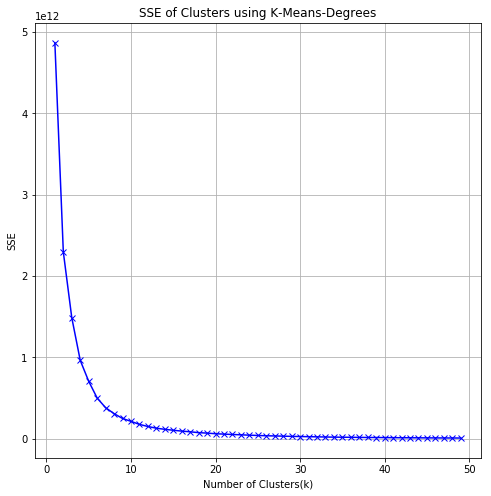

In [32]:
##SSE graph 
sse_values = []
for k in range(1,50):
    kmeans = KMeans(n_clusters = k, max_iter = 300, random_state = 1, n_init = 100)
    kmeans.fit(data_array)
    sse_values.append(kmeans.inertia_)
print (sse_values)

plt.figure(figsize=(8,8))
plt.plot(range(1,50),sse_values, 'xb-')
plt.title('SSE of Clusters using K-Means-Degrees')
plt.xlabel('Number of Clusters(k)')
plt.ylabel('SSE')
plt.grid()
plt.show()

In [33]:
kmeans = KMeans(n_clusters=8).fit(data_array)

In [34]:
labels = kmeans.labels_
sse = kmeans.inertia_
center = kmeans.cluster_centers_

print labels


[7 7 7 ..., 1 1 7]


In [36]:
df['cluster'] = labels
df

C:\Users\emily\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,name,state,city,INSTNM,review_count,stars,Morning,Afternoon,Night,Late,total_checkin,dist,UGDS,2010 Population,pop_weight,cluster
0,South Florida Style Chicken & Ribs,NC,Charlotte,King's College,4,4.5,0,4,3,0,7,4.824275,380.0,4796,0.079233,7
1,FūD at Salud,NC,Charlotte,Central Piedmont Community College,71,4.5,0,6,22,14,42,2.531085,17922.0,4796,3.736864,7
2,FūD at Salud,NC,Charlotte,King's College,71,4.5,0,6,22,14,42,2.612778,380.0,4796,0.079233,7
3,Island Hub Restaurant & Lounge,NC,Charlotte,Central Piedmont Community College,51,4.5,2,16,9,1,28,2.285101,17922.0,4796,3.736864,7
4,Island Hub Restaurant & Lounge,NC,Charlotte,King's College,51,4.5,2,16,9,1,28,1.757724,380.0,4796,0.079233,7
5,WAM Asian Grill,NC,Charlotte,Central Piedmont Community College,23,2.5,0,6,7,0,13,3.367558,17922.0,4796,3.736864,7
6,WAM Asian Grill,NC,Charlotte,King's College,23,2.5,0,6,7,0,13,3.234688,380.0,4796,0.079233,7
7,Coffee Cup,NC,Charlotte,Central Piedmont Community College,3,4.5,0,7,11,10,28,2.230282,17922.0,4796,3.736864,7
8,Coffee Cup,NC,Charlotte,King's College,3,4.5,0,7,11,10,28,2.354461,380.0,4796,0.079233,7
9,Ozpresso,NC,Charlotte,Central Piedmont Community College,14,4.0,1,19,51,0,71,2.418308,17922.0,4796,3.736864,7


In [37]:
df.to_csv("college_clusters.csv")